<a href="https://colab.research.google.com/github/lizalanchu/Cars_Moldova_homework1-/blob/main/%D0%94%D0%B73_Car_Moldova_SE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import библиотек

In [1]:
import pandas as pd
from google.colab import files 

import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns; sns.set()

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#Oчищенный набор данных

## Загрузка данных на Google Drive

In [12]:
uploaded = files.upload()

Saving cars_moldova_cat_num.csv to cars_moldova_cat_num.csv


## Считываем файл в DataFrame



метод .read_csv(path,delimiter) 

In [13]:
df = pd.read_csv('cars_moldova_cat_num.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,km_per_year,km_per_year_cat
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,11,17727.272727,17727.272727,1
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,8,16875.000000,16875.000000,1
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,10,11000.000000,11000.000000,1
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,16,12500.000000,12500.000000,1
4,23,126,2000,5,300000.0,2200.0,0,0,3490.0,22,13636.363636,13636.363636,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32215,42,88,2016,10,88000.0,1800.0,4,1,11500.0,6,14666.666667,14666.666667,1
32216,19,53,2002,3,225000.0,1800.0,3,0,4400.0,20,11250.000000,11250.000000,1
32217,6,77,2015,11,89000.0,1500.0,0,0,7000.0,7,12714.285714,12714.285714,1
32218,22,10,2006,1,370000.0,2000.0,0,0,4000.0,16,23125.000000,23125.000000,1


In [14]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

## Логистическая регрессия

In [15]:
class LinearRegression():
    def __init__(self, 
                 learning_rate = 0.5, 
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 random_state = 42):
        self.lr      = learning_rate
        self.epochs  = epochs
        self.weights = weights
        self.bias    = bias
        self.seed    = random_state
        self.batch_size = batch_size
        self.cost    = np.zeros(epochs)
        
        if not(self.weights is None) and (self.bias):
            if self.weights.size == X.shape[1]:
                self.weights = np.append(self.bias,self.weights)
    
    
    def forward(self, X):
        return self.weights.dot(X.T)
    
    
    def loss(self,yhat, y):
        return np.square(yhat - y).sum()/y.size
    
    
    def grad_step(self,yhat, y, X):
        return 2*np.dot(X.T, (yhat - y)) / y.size
    
    
    def update(self):    
        return self.weights - self.lr*self.grad
    
    
    def init(self, weights_size):
        np.random.seed(self.seed)
        return np.random.randn(weights_size)/np.sqrt(weights_size)
    
    
    def add_bias(self, X):
        return np.column_stack((np.ones(X.shape[0]), X))

    
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        return yhat
    

    def score(self, X, y):        
        yhat = self.predict(X)
        return 1-np.sum(np.square(y-yhat))/np.sum(np.square(y-np.mean(y)))


    def load_batch(self,X,y):
        idx_batch = np.random.randint(0,X.shape[0],self.batch_size)
        x_batch   = np.take(X, idx_batch, axis=0)
        x_batch   = self.add_bias(x_batch)
        y_batch   = np.take(y, idx_batch)
        return  x_batch, y_batch

    
    def fit(self, X, y):

        np.random.seed(self.seed)
        
        if self.weights is None:
            self.weights = self.init(X.shape[1])
        
        if self.bias is None: 
            self.bias    = self.init(1)
        
        if self.weights.size == X.shape[1]:
            #совмещаем в один массив, если мы этого не сделали
            self.weights = np.append(self.bias,self.weights)
        
        self.grad    = np.zeros(self.weights.shape)
        self.cost    = np.zeros(self.epochs)

        if self.batch_size is None:            
            x_batch   = self.add_bias(X)
            y_batch   = y
        
        for i in range(self.epochs): 

            if self.batch_size: 
                x_batch, y_batch = self.load_batch(X,y)

            yhat         = self.forward(x_batch)
            self.grad    = self.grad_step(yhat,  y_batch, x_batch) 
            self.weights = self.update()  
            self.cost[i] = self.loss(yhat,  y_batch)

        self.bias = self.weights[0]
     
    
    def plot_cost(self, figsize = (12,6)):
        plt.figure(figsize = figsize)
        plt.plot(self.cost,'-*')
        plt.show()
    
    
    def get_w_and_b(self):
        return (self.weights[1:], self.bias)

In [16]:
class ElasticRegression(LinearRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty = 0.001,
                 l2_penalty = 0.001,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 batch_size   = 1000, 
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         random_state = random_state)
        self.l1_penalty = l1_penalty
        self.l2_penalty = l2_penalty
    
    def loss(self,yhat, y):   
        l1_term = self.l1_penalty*np.sum(self.weights[1:])/y.size
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))/y.size
        return np.square(yhat - y).mean() + l1_term + l2_term
                  
    
    
    def update(self):    
        l2_term = self.l2_penalty*np.sum(self.weights[1:])
        return self.weights - self.lr*(self.grad + np.sign(self.weights)* self.l1_penalty + l2_term)

In [17]:
_EPS_ = 1e-6

class LogisticRegression(ElasticRegression):
    def __init__(self, 
                 learning_rate = 0.5,
                 l1_penalty = 0.0,
                 l2_penalty = 0.0,
                 epochs = 100, 
                 weights = None, 
                 bias    = None, 
                 threshold = 0.5,
                 batch_size   = 1000, 
                 random_state = 42):
        
        super().__init__(learning_rate = learning_rate,
                         epochs = epochs, 
                         weights = weights, 
                         bias    = bias, 
                         batch_size   = batch_size, 
                         random_state = random_state,
                         l1_penalty = l1_penalty,
                         l2_penalty = l2_penalty)       
        self.learning_rate = learning_rate/2
        self.threshold = threshold
    
    
    def loss(self,yhat, y):
        
        l1_term = self.l1_penalty*np.sum(self.weights[1:])/y.size
        l2_term = (self.l2_penalty/2)*np.sum(np.square(self.weights[1:]))/y.size
        
        return -(y*np.log(yhat  + _EPS_)+(1 - y)*np.log(1 - yhat  + _EPS_)).mean()\
            + l1_term+ l2_term 
    
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z)) 
    
    
    def forward(self, X):        
        return self.sigmoid(self.weights.dot(X.T))
    
    
    def to_class(self,logit):
        return (logit>=self.threshold)*1
    
    
    def predict(self, X):
        yhat = self.forward(self.add_bias(X))
        
        if self.threshold:
            return self.to_class(yhat)
        else:
            return yhat
    
    def score(self, X, y):
        yhat  = self.predict(X)
        return sum((yhat==y)*1)/y.size
    

    def classification_report(self, X,y):
        tp = 0 # true_positives
        tn = 0 # true_negatives
        fp = 0 # false_positives
        fn = 0 # false_negatives
        
        yhat  = self.predict(X)
        total = yhat.size
        
        for yhati,yi in zip(yhat,y):
            if yi == 1 and yhati == 1:
                tp += 1
            elif yi == 0 and yhati == 0:
                tn += 1
            elif yi == 1 and yhati == 0:
                fn += 1
            elif yi == 0 and yhati == 1:
                fp += 1

        print('True Positives:%.0f'%(tp), end = '\t')
        print('False Positives:%.0f'%(fp))
        print('False Negatives:%.0f'%(fn), end = '\t')
        print('True Negatives:%.0f'%(tn))
        
        print('Accuracy:%.4f'% ((tp + tn) / total))
        print('Recall:%.4f'% (tp / (tp + fn)), end = '\t')
        print('Precision:%.4f'%(tp / (tp + fp)))
        print('f1 measure:%.4f'%(tp / (tp + 0.5*(fp+fn))))

In [18]:
X = df[num_columns].values 
y = df["Transmission"].values 
features_names = df[num_columns].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 
pd.DataFrame(X_train).tail()

,0,1,2,3,4
22549,0.40,0.011012,0.291667,0.006513,0.005179
22550,0.74,0.208921,0.270833,0.061112,0.297166
22551,0.84,0.155127,0.270833,0.078146,0.343601
22552,0.84,0.219922,0.229167,0.066132,0.487865
22553,0.94,0.049905,0.375000,0.251503,0.248497


## Тест без регуляризации 

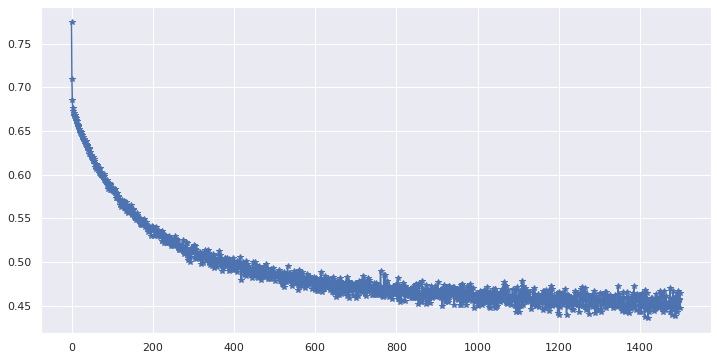

train Accuracy: 0.8052; test Accuracy: 0.8085
True Positives:3263	False Positives:709
False Negatives:1142	True Negatives:4552
Accuracy:0.8085
Recall:0.7407	Precision:0.8215
f1 measure:0.7790


In [19]:
regr = LogisticRegression(learning_rate=0.5,epochs=1500,batch_size=5000)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

* Много правильных ответов
* Нет ложных позитивных прогнозов



## Посмотрим веса

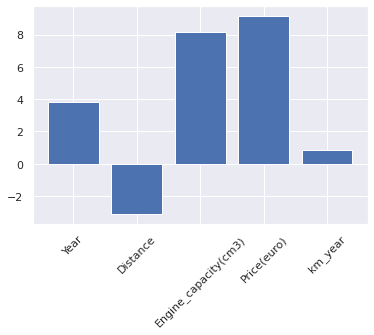

In [20]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Значимый признак цена

## Тест с регуляризацией L2

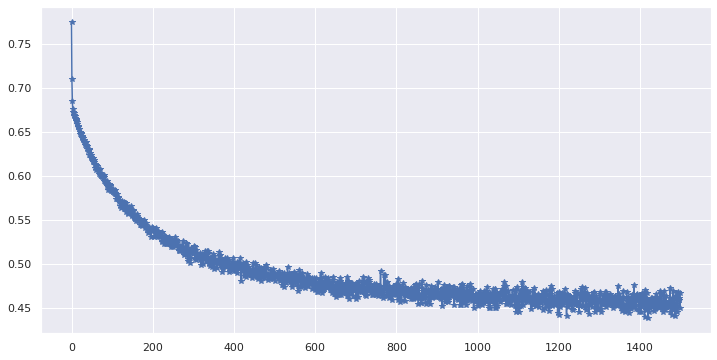

train Accuracy: 0.8048; test Accuracy: 0.8066
True Positives:3252	False Positives:716
False Negatives:1153	True Negatives:4545
Accuracy:0.8066
Recall:0.7383	Precision:0.8196
f1 measure:0.7768


In [21]:
regr = LogisticRegression(learning_rate=0.5,epochs=1500,batch_size=5000, l2_penalty = 0.0001)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

* Много правильных ответов
* Нет ложных позитивных прогнозов







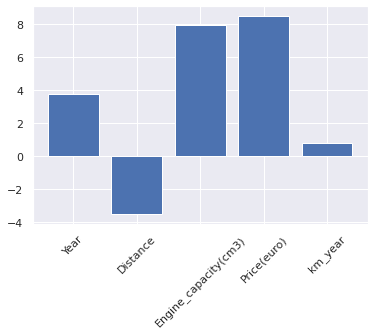

In [22]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Значимый признак цена

## Тест с регуляризацией L1

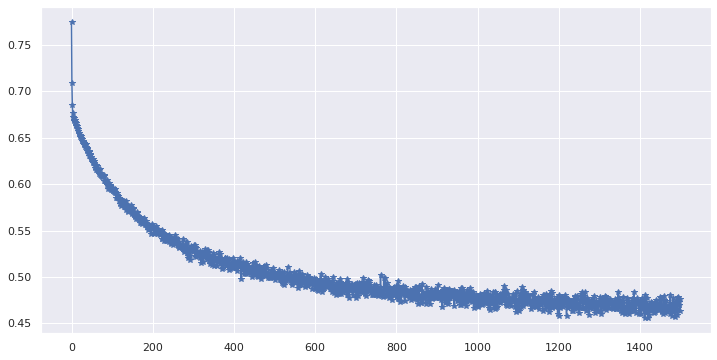

train Accuracy: 0.8063; test Accuracy: 0.8135
True Positives:3208	False Positives:606
False Negatives:1197	True Negatives:4655
Accuracy:0.8135
Recall:0.7283	Precision:0.8411
f1 measure:0.7806


In [23]:
regr = LogisticRegression(learning_rate=0.5,epochs=1500,batch_size=5000, l1_penalty = 0.005)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

* Много правильных ответов
* Нет ложных позитивных прогнозов

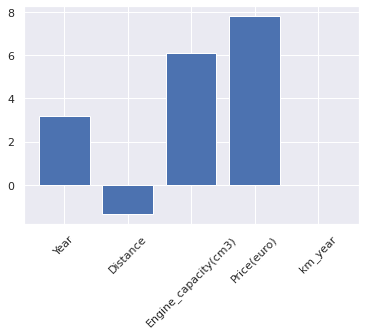

In [24]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Значимый признак  цена

##Эластичная регрессия

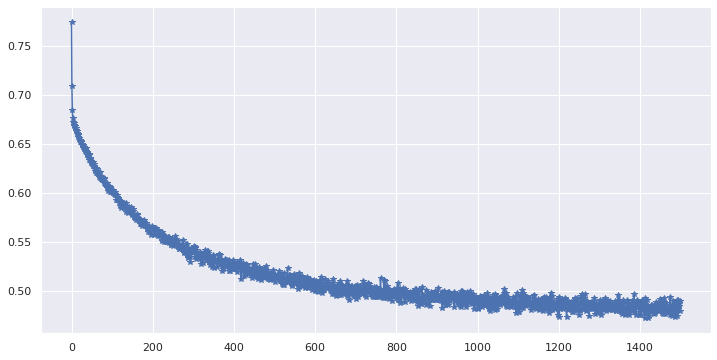

train Accuracy: 0.8063; test Accuracy: 0.8127
True Positives:3157	False Positives:562
False Negatives:1248	True Negatives:4699
Accuracy:0.8127
Recall:0.7167	Precision:0.8489
f1 measure:0.7772


In [25]:
regr = LogisticRegression(learning_rate=0.5,epochs=1500,batch_size=5000, l1_penalty = 0.008, l2_penalty = 0.00005)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

* Много правильных ответов
* Нет ложных позитивных прогнозов

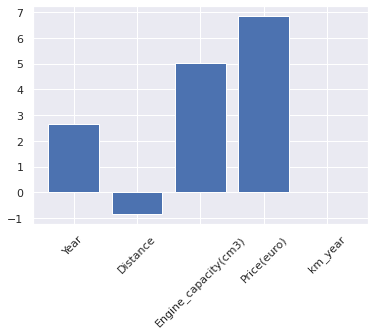

In [26]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

#Стандартизация

## Загрузка данных на Google Drive

In [29]:
uploaded = files.upload()

Saving cars_moldova_stand.csv to cars_moldova_stand.csv


## Считываем файл в DataFrame



метод .read_csv(path,delimiter) 

In [30]:
df = pd.read_csv('/content/cars_moldova_stand.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year,km_per_year,km_per_year_cat
0,40,92,2011,4,195000.0,1800.0,2,1,7750.0,11,17727.272727,17727.272727,1
1,32,62,2014,11,135000.0,1500.0,0,0,8550.0,8,16875.000000,16875.000000,1
2,32,71,2012,11,110000.0,1500.0,0,0,6550.0,10,11000.000000,11000.000000,1
3,28,23,2006,11,200000.0,1600.0,3,0,4100.0,16,12500.000000,12500.000000,1
4,23,126,2000,5,300000.0,2200.0,0,0,3490.0,22,13636.363636,13636.363636,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32215,42,88,2016,10,88000.0,1800.0,4,1,11500.0,6,14666.666667,14666.666667,1
32216,19,53,2002,3,225000.0,1800.0,3,0,4400.0,20,11250.000000,11250.000000,1
32217,6,77,2015,11,89000.0,1500.0,0,0,7000.0,7,12714.285714,12714.285714,1
32218,22,10,2006,1,370000.0,2000.0,0,0,4000.0,16,23125.000000,23125.000000,1


In [31]:
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

## Логистическая регрессия

In [32]:
X = df[num_columns].values 
y = df["Transmission"].values 
features_names = df[num_columns].columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 
pd.DataFrame(X_train).tail()

,0,1,2,3,4
22549,0.40,0.011012,0.291667,0.006513,0.005179
22550,0.74,0.208921,0.270833,0.061112,0.297166
22551,0.84,0.155127,0.270833,0.078146,0.343601
22552,0.84,0.219922,0.229167,0.066132,0.487865
22553,0.94,0.049905,0.375000,0.251503,0.248497


In [33]:
from matplotlib.colors import ListedColormap
def plot_data(ax,ds,name='',marker = 'o',colors =("#FF0000", '#0000FF'),alpha=0.7, s = 150, facecolor=True):
    X, y = ds

    cm_bright = ListedColormap(colors)
    ax.set_title(name, fontsize = 30)
    if facecolor:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   alpha =alpha)
    else:
        ax.scatter(X[:, 0], X[:, 1],
                   marker = marker, c=y,
                   cmap=cm_bright,s = s,
                   facecolor = 'None',
                   alpha =alpha)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    ax.grid(True)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

 # Тестирование без регуляризации 

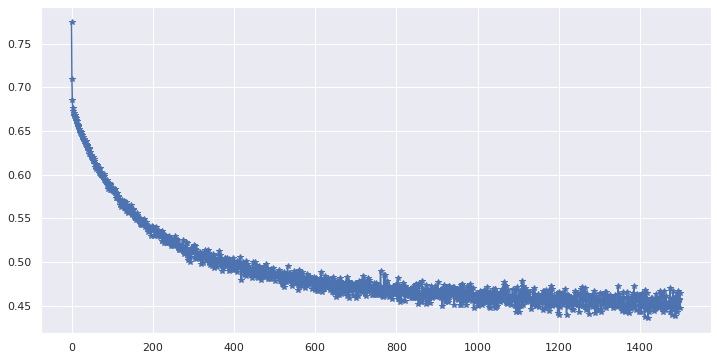

train Accuracy: 0.8052; test Accuracy: 0.8085
True Positives:3263	False Positives:709
False Negatives:1142	True Negatives:4552
Accuracy:0.8085
Recall:0.7407	Precision:0.8215
f1 measure:0.7790


In [34]:
regr = LogisticRegression(learning_rate=0.5,epochs=1500,batch_size=5000)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

* Много правильных ответов
* Нет ложных позитивных прогнозов


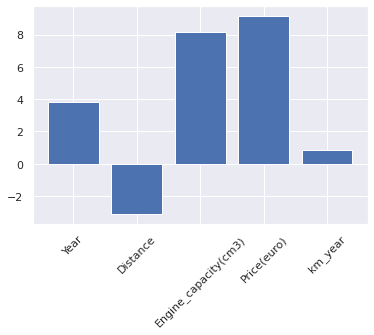

In [35]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

###Значимый признак цена





##Тест с регуляризацией L2

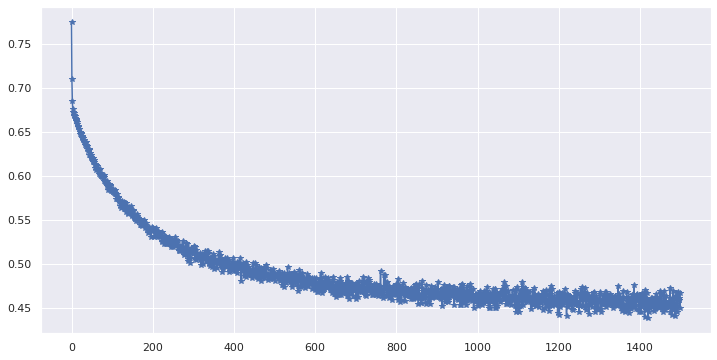

train Accuracy: 0.8048; test Accuracy: 0.8066
True Positives:3252	False Positives:716
False Negatives:1153	True Negatives:4545
Accuracy:0.8066
Recall:0.7383	Precision:0.8196
f1 measure:0.7768


In [36]:
regr = LogisticRegression(learning_rate=0.5,epochs=1500,batch_size=5000, l2_penalty = 0.0001)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

* Много правильных ответов
* Нет ложных позитивных прогнозов

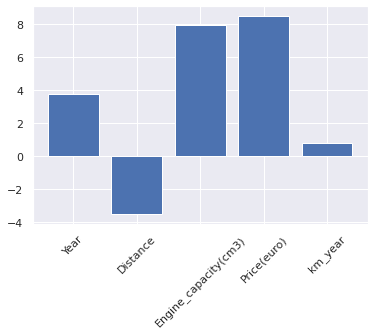

In [37]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Значимый признак  цена

## Проведем тест с L1 регуляризацией

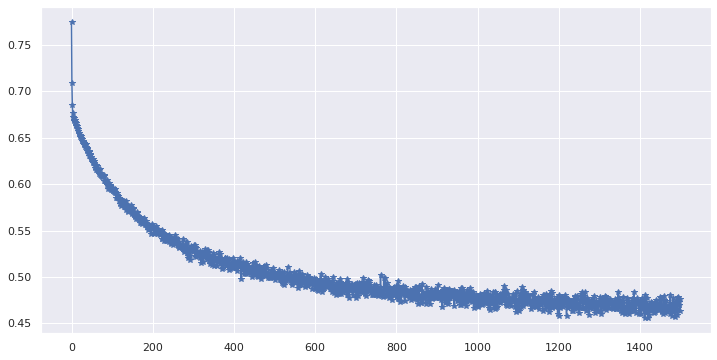

train Accuracy: 0.8063; test Accuracy: 0.8135
True Positives:3208	False Positives:606
False Negatives:1197	True Negatives:4655
Accuracy:0.8135
Recall:0.7283	Precision:0.8411
f1 measure:0.7806


In [38]:
regr = LogisticRegression(learning_rate=0.5,epochs=1500,batch_size=5000, l1_penalty = 0.005)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

* Много правильных ответов
* Нет ложных позитивных прогнозов



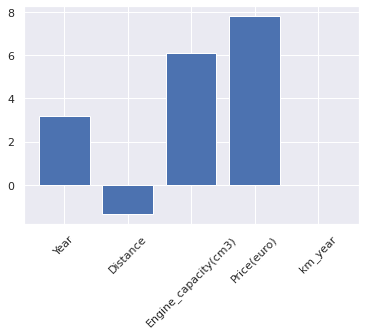

In [39]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Значимый признак цена

## Эластичная регрессия

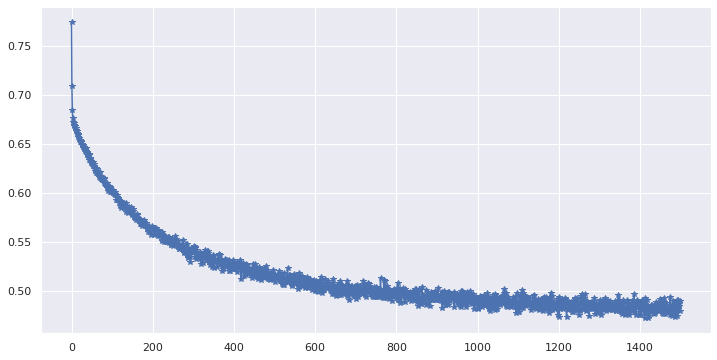

train Accuracy: 0.8063; test Accuracy: 0.8127
True Positives:3157	False Positives:562
False Negatives:1248	True Negatives:4699
Accuracy:0.8127
Recall:0.7167	Precision:0.8489
f1 measure:0.7772


In [40]:
regr = LogisticRegression(learning_rate=0.5,epochs=1500,batch_size=5000, l1_penalty = 0.008, l2_penalty = 0.00005)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

* Много правильных ответов
* Нет ложных позитивных прогнозов

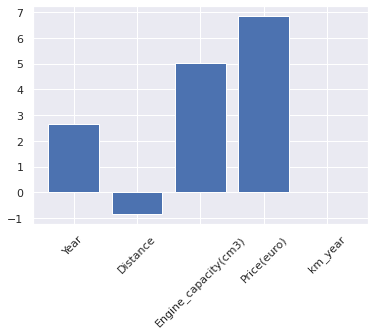

In [41]:
w, b = regr.get_w_and_b()
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Значимый признак цена





# Стандертизация не повлияла на модель в процессе предварительной обработки 

#One-hot кодирование

##Загрузка данных на Google Drive

In [43]:
uploaded = files.upload()

Saving cars_moldova_onehot.csv to cars_moldova_onehot.csv


## Считываем файл в DataFrame



метод .read_csv(path,delimiter) 

In [44]:
df = pd.read_csv('/content/cars_moldova_onehot.csv', delimiter = ',')
df

,Year,Distance,Engine_capacity(cm3),Transmission,Price(euro),Age,km_year,km_per_year,Make_Alfa Romeo,Make_Audi,...,Style_Universal,Fuel_type_Diesel,Fuel_type_Electric,Fuel_type_Hybrid,Fuel_type_Metan/Propan,Fuel_type_Petrol,Fuel_type_Plug-in Hybrid,km_per_year_cat_large,km_per_year_cat_medium,km_per_year_cat_small
0,2011,195000.0,1800.0,1,7750.0,11,17727.272727,17727.272727,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2014,135000.0,1500.0,0,8550.0,8,16875.000000,16875.000000,0,0,...,1,1,0,0,0,0,0,0,1,0
2,2012,110000.0,1500.0,0,6550.0,10,11000.000000,11000.000000,0,0,...,1,1,0,0,0,0,0,0,1,0
3,2006,200000.0,1600.0,0,4100.0,16,12500.000000,12500.000000,0,0,...,1,0,0,0,1,0,0,0,1,0
4,2000,300000.0,2200.0,0,3490.0,22,13636.363636,13636.363636,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32215,2016,88000.0,1800.0,1,11500.0,6,14666.666667,14666.666667,0,0,...,0,0,0,0,0,1,0,0,1,0
32216,2002,225000.0,1800.0,0,4400.0,20,11250.000000,11250.000000,0,0,...,0,0,0,0,1,0,0,0,1,0
32217,2015,89000.0,1500.0,0,7000.0,7,12714.285714,12714.285714,0,0,...,1,1,0,0,0,0,0,0,1,0
32218,2006,370000.0,2000.0,0,4000.0,16,23125.000000,23125.000000,0,0,...,0,1,0,0,0,0,0,0,1,0


In [45]:
cat_columns = []
num_columns = []

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('Категориальные данные:\t ',cat_columns, '\n Число столблцов = ',len(cat_columns))

print('Числовые данные:\t ',  num_columns, '\n Число столблцов = ',len(num_columns))

Категориальные данные:	  [] 
 Число столблцов =  0
Числовые данные:	  ['Year', 'Distance', 'Engine_capacity(cm3)', 'Transmission', 'Price(euro)', 'Age', 'km_year', 'km_per_year', 'Make_Alfa Romeo', 'Make_Audi', 'Make_BMW', 'Make_Chevrolet', 'Make_Chrysler', 'Make_Citroen', 'Make_Dacia', 'Make_Daewoo', 'Make_Daihatsu', 'Make_Dodge', 'Make_Fiat', 'Make_Ford', 'Make_GAZ', 'Make_Honda', 'Make_Hyundai', 'Make_Infiniti', 'Make_Jaguar', 'Make_Jeep', 'Make_KIA', 'Make_Land Rover', 'Make_Lexus', 'Make_Lincoln', 'Make_Mazda', 'Make_Mercedes', 'Make_Mini', 'Make_Mitsubishi', 'Make_Moskvich / Izh', 'Make_Nissan', 'Make_Opel', 'Make_Peugeot', 'Make_Porsche', 'Make_Rare', 'Make_Renault', 'Make_Rover', 'Make_Seat', 'Make_Skoda', 'Make_Smart', 'Make_Ssangyong', 'Make_Subaru', 'Make_Suzuki', 'Make_Toyota', 'Make_Vaz', 'Make_Volkswagen', 'Make_Volvo', 'Model_100', 'Model_206', 'Model_2106', 'Model_2107', 'Model_2121niva', 'Model_3', 'Model_3 Series', 'Model_307', 'Model_323', 'Model_5 Series', 'Model_6'

## Логистическая регрессия

In [46]:
df_num = df[num_columns].copy()
X = df_num.drop(columns = ["Transmission"]).values
y = df["Transmission"].values 
features_names = df_num.drop(columns = ["Transmission"]).columns

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test) 
pd.DataFrame(X_train).tail()

,0,1,2,3,4,5,6,7,8,9,...,198,199,200,201,202,203,204,205,206,207
22549,0.40,0.011012,0.291667,0.006513,0.60,0.005179,0.005179,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
22550,0.74,0.208921,0.270833,0.061112,0.26,0.297166,0.297166,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
22551,0.84,0.155127,0.270833,0.078146,0.16,0.343601,0.343601,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
22552,0.84,0.219922,0.229167,0.066132,0.16,0.487865,0.487865,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
22553,0.94,0.049905,0.375000,0.251503,0.06,0.248497,0.248497,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Тестирование без регуляризации 

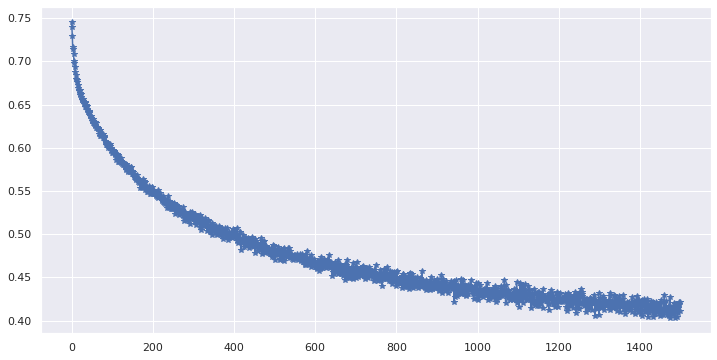

train Accuracy: 0.8240; test Accuracy: 0.8313
True Positives:3428	False Positives:654
False Negatives:977	True Negatives:4607
Accuracy:0.8313
Recall:0.7782	Precision:0.8398
f1 measure:0.8078


In [47]:
regr = LogisticRegression(learning_rate=0.05,epochs=1500,batch_size=5000)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

* Много правильных ответов
* Нет ложных позитивных прогнозов

Посмотрим веса

In [48]:
w, b = regr.get_w_and_b()
plt.figure(figsize=(199,100))
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

##Тест с регуляризацией L2

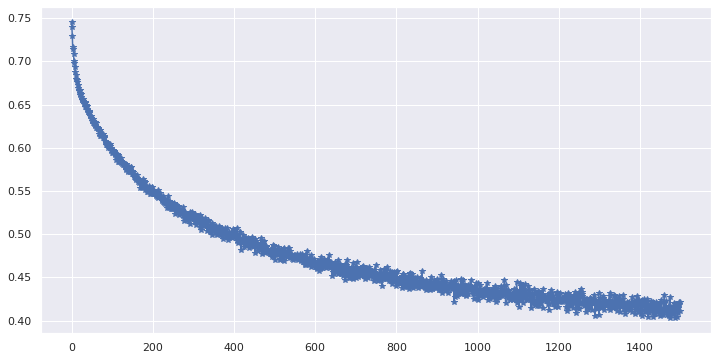

train Accuracy: 0.8239; test Accuracy: 0.8312
True Positives:3429	False Positives:656
False Negatives:976	True Negatives:4605
Accuracy:0.8312
Recall:0.7784	Precision:0.8394
f1 measure:0.8078


In [49]:
regr = LogisticRegression(learning_rate=0.05,epochs=1500,batch_size=5000, l2_penalty = 0.0001)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

* Много правильных ответов
* Нет ложных позитивных прогнозов

In [50]:
w, b = regr.get_w_and_b()
plt.figure(figsize=(199,100))
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

Значимые признаки это цена и Fluel_type_Hybrid

## Тест с L1 регуляризацией

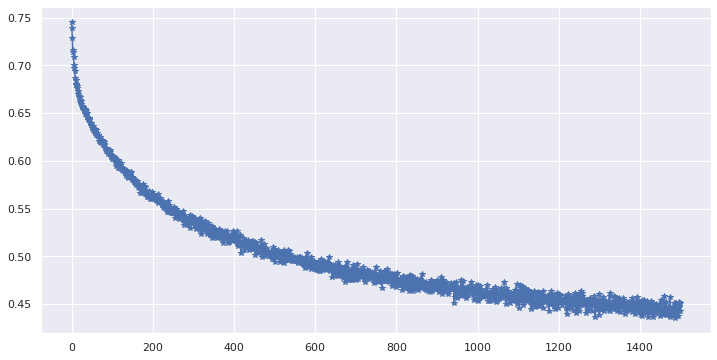

train Accuracy: 0.8170; test Accuracy: 0.8232
True Positives:3360	False Positives:664
False Negatives:1045	True Negatives:4597
Accuracy:0.8232
Recall:0.7628	Precision:0.8350
f1 measure:0.7972


In [51]:
regr = LogisticRegression(learning_rate=0.05,epochs=1500,batch_size=5000, l1_penalty = 0.005)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

* Много правильных ответов
* Нет ложных позитивных прогнозов

In [52]:
w, b = regr.get_w_and_b()
plt.figure(figsize=(199,100))
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

## Эластичная регрессия

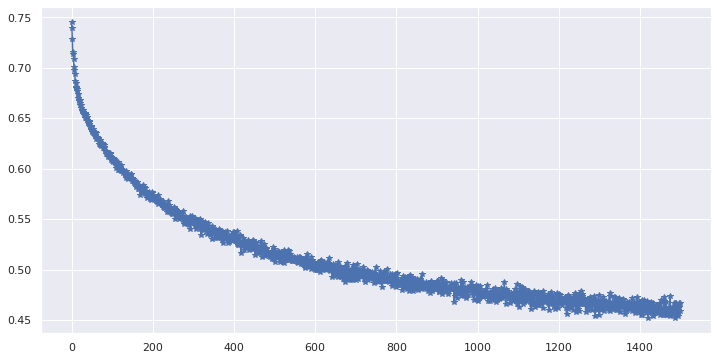

train Accuracy: 0.8145; test Accuracy: 0.8202
True Positives:3343	False Positives:676
False Negatives:1062	True Negatives:4585
Accuracy:0.8202
Recall:0.7589	Precision:0.8318
f1 measure:0.7937


In [53]:
regr = LogisticRegression(learning_rate=0.05,epochs=1500,batch_size=5000, l1_penalty = 0.008, l2_penalty = 0.00005)

regr.fit(X_train, y_train)

regr.plot_cost()

print( 'train Accuracy: %.4f; test Accuracy: %.4f' % (regr.score(X_train, y_train), regr.score(X_test, y_test)))

regr.classification_report(X_test, y_test)

In [54]:
w, b = regr.get_w_and_b()
plt.figure(figsize=(199,100))
plt.bar(x = range(w.size),height=w)
plt.xticks(range(w.size),features_names, rotation = 45 );

## One hot улучшила модель